# Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as nd

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'] , mnist['target']

In [4]:
x.shape #this is one d array

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
x.to_numpy()
print(type(x), x.shape)


<class 'pandas.core.frame.DataFrame'> (70000, 784)


In [9]:
some_digit = x.to_numpy ()[36001]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

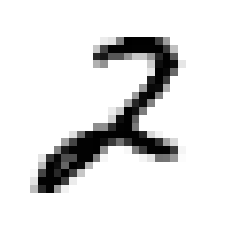

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary , interpolation="nearest")
plt.axis("off")

In [11]:
y[36001]  #to check the label

'2'

In [12]:
x_train , x_test = x[:60000] , x[60000:]

In [13]:
y_train , y_test = y[:60000] , x[60000:]

# Creating a 2 detector

In [15]:
import numpy as np
y_train = y_train.astype(np.int8)  #converting strings to integer of Y_train and y_test
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)    #created a 2 detector if the digit is 2 then gives True otherwise false
y_test_2 = (y_test==2)

In [16]:
y_train_2.to_numpy()        #gives many false because the probality of 2 occur is only 10%

array([False, False, False, ..., False, False, False])

# Using a classifier

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(tol=0.1)  # Tolerance used to fast the output 

In [19]:
clf.fit(x_train,y_train_2)

c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [20]:
clf.predict([some_digit])

array([ True])

# Crossvalidation

In [21]:
from sklearn.model_selection import cross_val_score    #if we give cv=3 then he make 3,3 crossvalidation make one test and train at other

In [22]:
a=cross_val_score(clf, x_train , y_train_2 , cv=3 , scoring="accuracy")

c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [23]:
a.mean()  #show our accuracy

0.9781

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(clf, x_train , y_train_2 , cv=3)

c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [25]:
y_train_pred

array([False, False, False, ..., False, False, False])

# Calculatin confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_train_2 , y_train_pred)  

array([[53566,   476],
       [  838,  5120]], dtype=int64)

In [29]:
confusion_matrix(y_train_2 , y_train_2) # this is the ideal matrix for this model when FP and FN are 0a

array([[54042,     0],
       [    0,  5958]], dtype=int64)

# Precision and Recall

In [31]:
from sklearn.metrics import precision_score , recall_score

In [33]:
precision_score(y_train_2 , y_train_pred)  #this is our precision score

0.9149392423159399

In [34]:
recall_score(y_train_2 , y_train_pred)  #this is our recall score

0.8593487747566297

# F1 - Score

In [35]:
from sklearn.metrics import f1_score

In [36]:
f1_score(y_train_2 , y_train_pred)

0.8862731521550978

# Plotting the Precision Recall Curve

In [39]:
from sklearn.metrics import precision_recall_curve

In [47]:
y_scores = cross_val_predict(clf, x_train , y_train_2 , cv=3 , method="decision_function")

c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [48]:
y_scores

array([-10.7942507 ,  -8.66111618,  -7.04486169, ..., -12.75771547,
        -8.09752175, -10.65758909])

In [49]:
precisions,recall, thresholds = precision_recall_curve(y_train_2 , y_scores)

In [50]:
recall

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [51]:
precisions

array([0.10033006, 0.1003149 , 0.10031659, ..., 1.        , 1.        ,
       1.        ])

In [53]:
thresholds

array([-27.07409967, -27.05328011, -27.03370014, ...,  18.3698966 ,
        18.59160335,  19.14827578])

<function matplotlib.pyplot.show(close=None, block=None)>

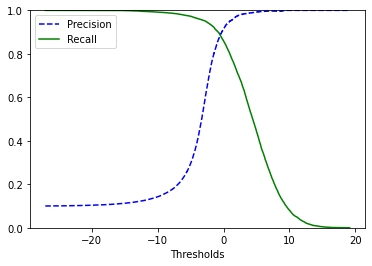

In [57]:
plt.plot(thresholds,precisions[:-1] , "b--" , label="Precision")
plt.plot(thresholds,recall[:-1] , "g-" , label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show